In [1]:
import pandas as pd 
import numpy as np 
import pyodbc 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-P4G0C3D\SQLEXPRESS02;'
    'DATABASE=CHURN;'
    'Trusted_Connection=yes;'
)


In [3]:
conn = pyodbc.connect(conn_str)

In [4]:
query = "SELECT * FROM dbo.[WA_Fn-UseC_-Telco-Customer-Churns]"
df = pd.read_sql(query, conn)

df 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,No phone service,DSL,No,...,No,No,No,No,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,No,DSL,Yes,...,Yes,No,No,No,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,No,DSL,Yes,...,No,No,No,No,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,No,Fiber optic,No,...,No,No,No,No,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,False,True,True,24,True,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,True,Mailed check,84.800003,1990.500000,False
7039,2234-XADUH,Female,False,True,True,72,True,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,True,Credit card (automatic),103.199997,7362.899902,False
7040,4801-JZAZL,Female,False,True,True,11,False,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,True,Electronic check,29.600000,346.450012,False
7041,8361-LTMKD,Male,True,True,False,4,True,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,True,Mailed check,74.400002,306.600006,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   bool   
 4   Dependents        7043 non-null   bool   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   bool   
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   bool   


In [6]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771363
min,0.000000,18.250000,18.799999
25%,9.000000,35.500000,401.449997
50%,29.000000,70.349998,1397.475037
75%,55.000000,89.849998,3794.737488
max,72.000000,118.750000,8684.799805


### Insights from Summary Statistics

1. **MonthlyCharges**  
   - Data is within a normal range.  
   - Median is around $70, and 25% of customers pay more than $89.8.  
   - This high-cost group may show higher churn if they don’t feel they’re getting enough value.  

2. **TotalCharges**  
   - Data is not evenly spread, as the standard deviation is almost the same as the mean.  
   - This points to positive skewness: most customers pay lower totals, but a smaller group has very high totals.  
   - Some missing values exist, likely from new customers (tenure = 0).  

3. **Tenure**  
   - Customers stay anywhere from 0 to 72 months.  
   - The median is 29 months, so half leave before 2.5 years.  
   - Variation is high, showing two groups: early churners (0–9 months) and long-term loyal customers.  


## Dealing With Null Values 

In [7]:
df['TotalCharges'].isna().sum()

np.int64(11)

In [8]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

### Handling Missing Values in TotalCharges

- 11 null values found in TotalCharges  
- All belong to customers with tenure = 0  
- These are newcomers who just subscribed and haven’t been billed yet  
- Replaced nulls with 0 as in 0 charges so far  
- Kept them in the dataset since they represent early churn risk  


In [9]:
df.duplicated().sum()

np.int64(0)

# Checking For Outliers

In [10]:
Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1
Lower_Bound = Q1 - 1.5 * IQR
Upper_Bound = Q3 + 1.5 * IQR 

In [11]:
Lower_Bound, Upper_Bound

(np.float64(-4683.524993896484), np.float64(8868.67495727539))

In [12]:
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
Lower_Bound = Q1 - 1.5 * IQR
Upper_Bound = Q3 + 1.5 * IQR 

In [13]:
Lower_Bound, Upper_Bound

(np.float64(-46.02499771118164), np.float64(171.37499618530273))

In [14]:
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1
Lower_Bound = Q1 - 1.5 * IQR
Upper_Bound = Q3 + 1.5 * IQR 

In [15]:
Lower_Bound, Upper_Bound

(np.float64(-60.0), np.float64(124.0))

### Outlier Check – Summary

- **TotalCharges**  
  - Bounds: –4683 to 8868  
  - Low Bound is irrelevant as charges can't be negative
  - Max value 8685 is within range  
  - No extreme outliers 

- **MonthlyCharges**  
  - Bounds: –46 to 171  
  - Low Bound is irrelevant as charges can't be negative
  - Max value 118.75 is within range  
  - No extreme outliers 

- **Tenure**  
  - Bounds: –60 to 124  
  - Max value 72 is within range  
  - No extreme outliers 

**Conclusion:** No extreme outliers detected in the dataset. All records kept, since high values represent valid customer behavior and are important for churn analysis.  


# EDA

In [16]:
df['Churn'].value_counts(normalize=True) * 100

Churn
False    73.463013
True     26.536987
Name: proportion, dtype: float64

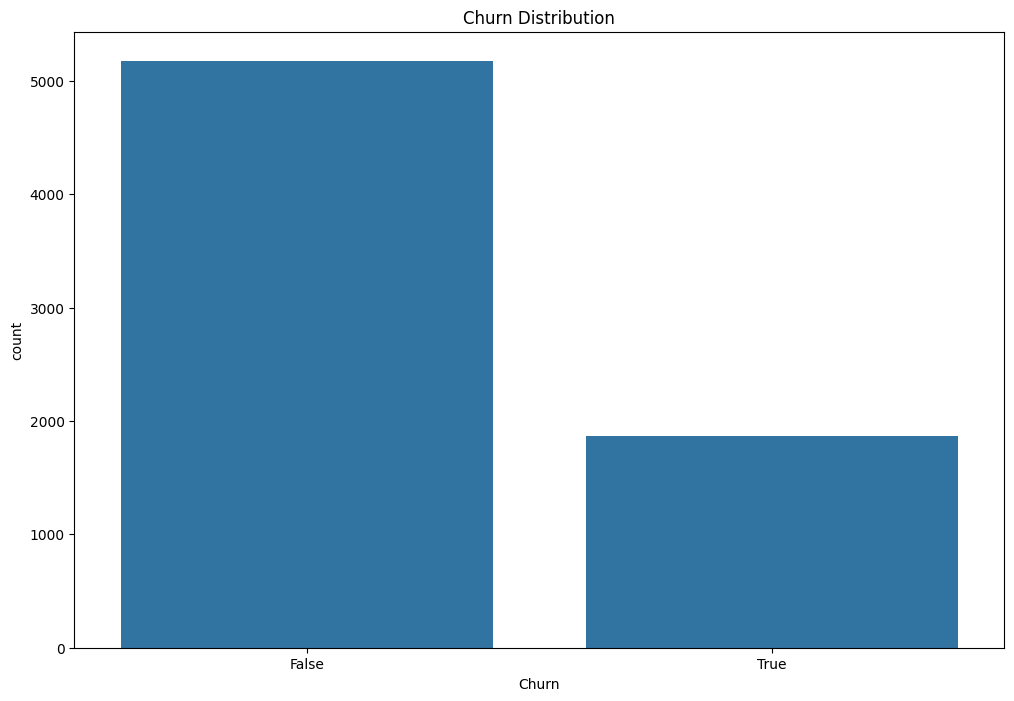

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

### Churn Distribution

- Customers who stayed ~ 73.5%
- Customers who churned ~ 26.5%
- Churn rate is high (26%)

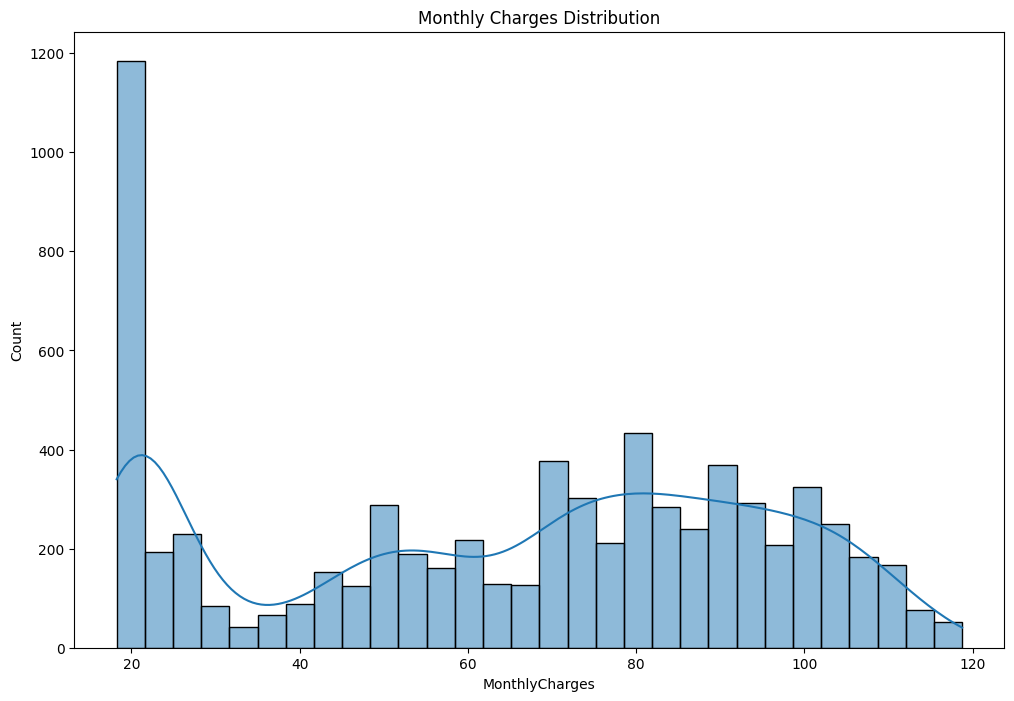

In [18]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='MonthlyCharges', bins = 30, kde=True)
plt.title('Monthly Charges Distribution')
plt.show()

### Monthly Charges Distribution

- High spike in the $20 means that clearly the highest segment of customers are on the low-cost plans
- High paying customer segment($100-$120) may be the more price-senisitive and at higher churn risk

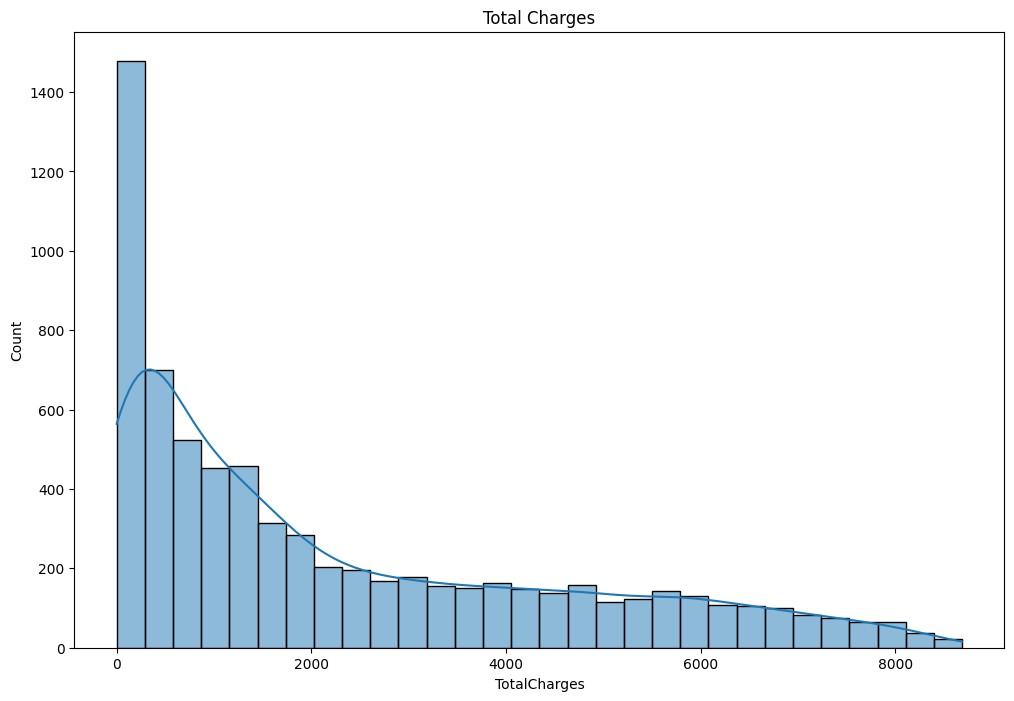

In [19]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='TotalCharges', bins=30, kde=True)
plt.title('Total Charges')
plt.show()

### Total Charges Distribution

- Strongly Positive Skewed shows that majority of customers are low to medium spenders
- High Spenders ($5000+) exist but are rare
- Distribution expains that many customers leave early, while a smaller group stays long-term which leads to higher total charges which make sense in the subscription-based business models where loyalty drives revenue

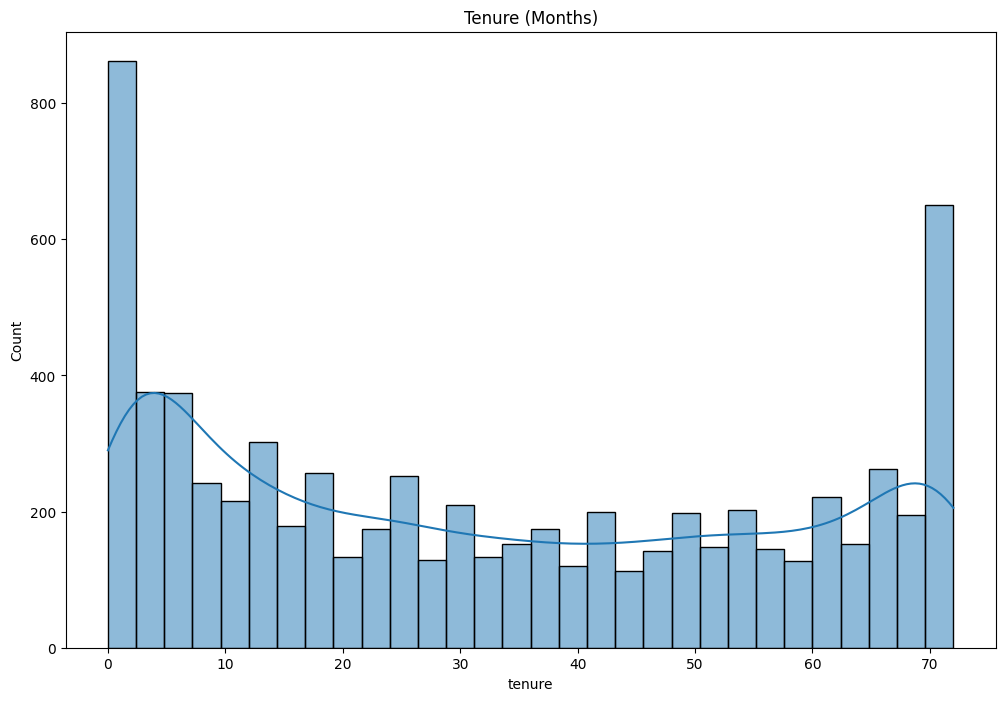

In [20]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='tenure', bins=30, kde=True)
plt.title('Tenure (Months)')
plt.show()

### Tenure Distributions

- A significant high segment of customers leave within the first few months, indicates pottential issues in the onboarding process, service issues or gap between the expetations and the actual value
- There is relatively low representation for the medium-term customer segment (10~50 months), suggesting challenges in sustsaining customer relationships beyong the inital stage 
- There is a relative spike in the high-term segment(~70 months) shows that there is a loyal that sticks around once they pass the early drop-off phase

# Churn Rate by Tenure(Months)

In [21]:
df['tenure_ranges'] = pd.cut(df['tenure'], bins=[-1, 0, 3, 9, 29, 59, 72], labels = ['Newcomers', '1-3 M', '4-9 M', '10-29 M', '30-59 M', '60+M'])

In [22]:
df['Churn'].value_counts()

Churn
False    5174
True     1869
Name: count, dtype: int64

In [23]:
df['Churn_bins'] = df['Churn'].replace({False:0, True:1})

In [24]:
df['Churn_bins']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_bins, Length: 7043, dtype: int64

In [25]:
Churn_info = df.groupby('tenure_ranges').agg(
    tenure_churn_rate=('Churn_bins', 'mean'),
    count=('customerID', 'count'),        
).reset_index()
Churn_info['tenure_churn_rate'] = Churn_info['tenure_churn_rate'] * 100
Churn_info

,tenure_ranges,tenure_churn_rate,count
0,Newcomers,0.000000,11
1,1-3 M,56.803045,1051
2,4-9 M,41.161616,792
3,10-29 M,28.338192,1715
4,30-59 M,18.131592,1991
5,60+M,6.675657,1483


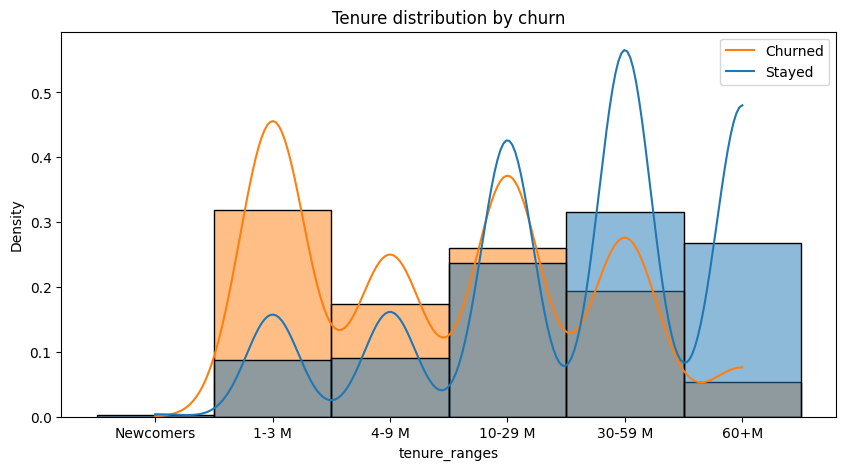

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='tenure_ranges', hue='Churn_bins', bins=30, kde=True, stat='density', common_norm=False)
plt.legend(['Churned','Stayed'])
plt.title('Tenure distribution by churn')
plt.show()


In [27]:
tenure_churned = df.loc[df['Churn_bins']==1, 'tenure']
tenure_stayed = df.loc[df['Churn_bins']==0, 'tenure']

In [28]:
tenure_churned.value_counts

<bound method IndexOpsMixin.value_counts of 2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64>

In [29]:
from scipy import stats

u_stat, p_value = stats.mannwhitneyu(tenure_churned, tenure_stayed, alternative='two-sided')
u_stat, p_value


(np.float64(2515538.0), np.float64(2.419635517951866e-208))

### Churn by Tenure (Months)

- The '1–3 months' group has the highest churn rate (~57%) → signals problems in onboarding or early experience  
- The '4–9 months' group churn rate drops (~41%) but is still high → fragile retention in the first year  
- The '10–29 months' group churn rate goes down further (~28%) → customers start stabilizing after ~1 year  
- The '30–59 months' group churn rate drops to ~18% → long-term customers show strong loyalty  
- The '60+ months' group churn rate is lowest → represents the very loyal customer base  

### Statistical Test – Tenure vs Churn

- Ran Mann–Whitney test to validate the difference in tenure between churned vs stayed  
- U statistic = 2,515,538, p-value ≈ 0 (2.4e-208) → result is highly significant (p << 0.05)  
- Confirms that churned customers have much lower tenure compared to retained ones  
- Strengthens the insight that **early-stage customers are at the highest churn risk**, while long-tenured customers form a stable loyal base  


# Churn By Monthly Charges

In [30]:
df['Monthly_Charges_Categories'] = pd.cut(df['MonthlyCharges'], bins=[0, 25, 50, 80, 100, 120], labels=['Very Low(~$20)', 'Budget(~$26-$50)', 'Mid(~$51-$80)', 'Premium(~$81-$100)', 'High Premium(~$101-$120)'])

In [31]:
monthly_charges_info = df.groupby('Monthly_Charges_Categories').agg(
    churn_rate_percent=('Churn_bins', 'mean'),
    count=('customerID', 'count'),        
).reset_index()
monthly_charges_info['churn_rate_percent'] = monthly_charges_info['churn_rate_percent'] * 100
monthly_charges_info

,Monthly_Charges_Categories,churn_rate_percent,count
0,Very Low(~$20),9.032717,1406
1,Budget(~$26-$50),26.203807,893
2,Mid(~$51-$80),28.970164,2078
3,Premium(~$81-$100),37.018141,1764
4,High Premium(~$101-$120),28.048780,902


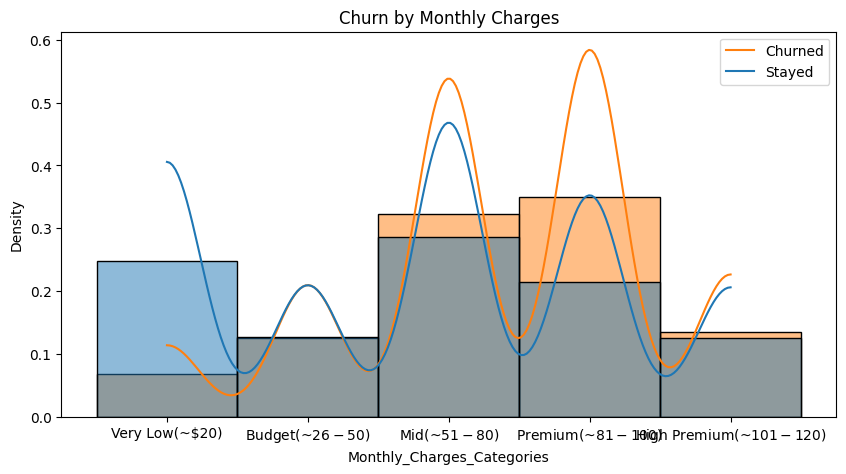

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Monthly_Charges_Categories', hue='Churn_bins', bins=30, kde=True, stat='density', common_norm=False)
plt.legend(['Churned','Stayed'])
plt.title('Churn by Monthly Charges')
plt.show()


In [33]:
monthly_charge_churned = df.loc[df['Churn_bins']==1, 'MonthlyCharges']
monthly_charge_stayed = df.loc[df['Churn_bins']==0, 'MonthlyCharges']

In [34]:
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(monthly_charge_churned, monthly_charge_stayed, equal_var=False)
t_stat, p_val

(np.float64(18.407526655751717), np.float64(8.592452201104863e-73))

### Monthly Charges vs Churn

- Very Low (~$20): Churn rate is lowest (~9%) → customers on the cheapest plans tend to stay.
- Budget (~$26–$50): Churn rises sharply (~26%) → mid-low customers start doubting value.
- Mid (~$51–$80): Churn climbs higher (~29%) → fragile middle segment, not cheap enough to stay without thinking, not premium enough to feel value.
- Premium (~$81–$100): Highest churn (~37%) → price-sensitive group, paying the most but not feeling rewarded.
- High Premium (~$101–$120): Churn surprisingly drops (~28%) → high spenders may be more loyal if they perceive real premium benefits.

### Statistical Test – Welch’s t-test

- Null Hypothesis (H₀): No difference in MonthlyCharges between churned and stayed customers.
- Result: t = 18.4, p ≈ 0 → highly significant.
- Interpretation: Churned customers pay higher MonthlyCharges on average compared to those who stay. Confirms that pricing pressure is a major churn driver.

# Churn Vs Contract Type

In [35]:
contract_type_churn = pd.crosstab(df['Contract'], df['Churn_bins'])
contract_type_churn['churn_rate%'] = (contract_type_churn[1] / (contract_type_churn[0] + contract_type_churn[1]) * 100)

In [36]:
contract_type_churn = contract_type_churn.reset_index()


In [37]:
contract_type_churn

Churn_bins,Contract,0,1,churn_rate%
0,Month-to-month,2220,1655,42.709677
1,One year,1307,166,11.269518
2,Two year,1647,48,2.831858


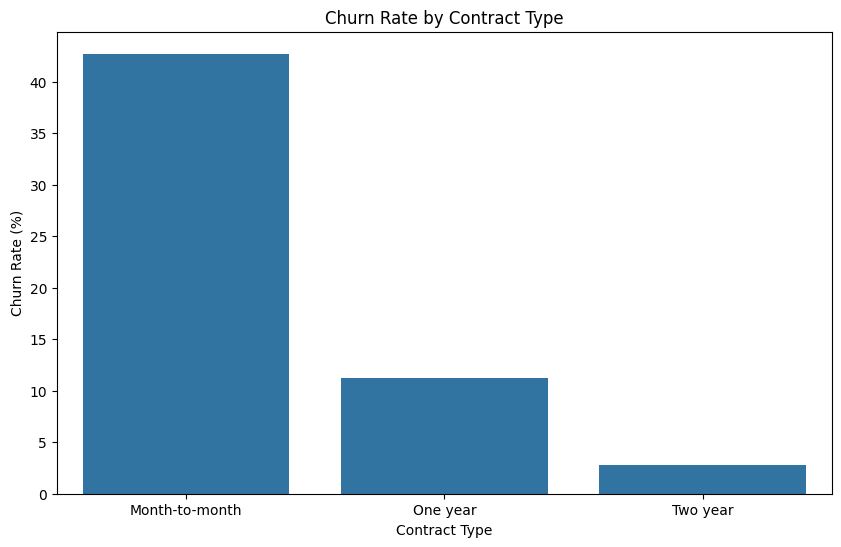

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(data=contract_type_churn, x='Contract', y='churn_rate%')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.show()

In [39]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['Contract'], df['Churn_bins'])


chi2, p, dof, expected = chi2_contingency(contingency)

chi2, p


(np.float64(1184.5965720837926), np.float64(5.863038300673391e-258))

### Churn By Contract Type

- Month-to-month: (~43% churn): Highest churn rate by far.
Customers have no lock-in → easy to cancel.
Suggests weaker perceived value + maximum flexibility = high churn risk.

- One year (~11% churn): 
Big drop from month-to-month.
Moderate contract lock-in + some penalties help reduce churn.
Customers here show more stability but can still churn after 12 months.

- Two year (~3% churn): 
Lowest churn rate.
Stickiness is more structural than satisfaction → early cancellation is costly.
Strongest evidence that long-term contracts keep customers.

### Statistical Test – Chi-square

- Null Hypothesis (H₀): Churn is independent of contract type.

- Result: χ² = 1184.6, p ≈ 0 → highly significant.

- Conclusion: Churn is strongly associated with contract type. 

# Churn Vs Payment Method

In [40]:
payment_method_churn = pd.crosstab(df['PaymentMethod'], df['Churn_bins'])
payment_method_churn['churn_rate%'] = (payment_method_churn[1] / (payment_method_churn[0] + payment_method_churn[1]) * 100)
payment_method_churn = payment_method_churn.reset_index()

In [41]:
payment_method_churn

Churn_bins,PaymentMethod,0,1,churn_rate%
0,Bank transfer (automatic),1286,258,16.709845
1,Credit card (automatic),1290,232,15.243101
2,Electronic check,1294,1071,45.285412
3,Mailed check,1304,308,19.106700


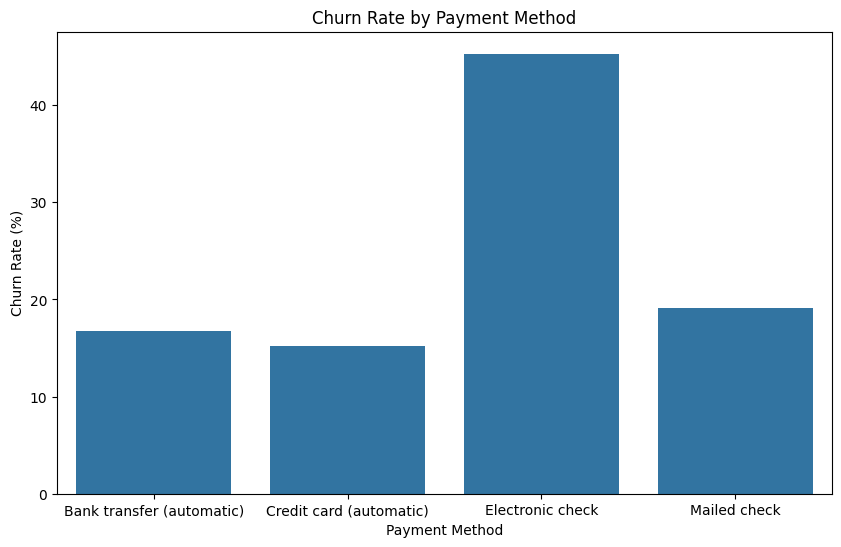

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(data=payment_method_churn, x='PaymentMethod', y='churn_rate%')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate (%)')
plt.show()

### Churn by Payment Method

- Automatic payments (Bank transfer, Credit card) show the lowest churn rates.

- Customers don’t have to renew manually → less friction, less chance to reconsider leaving every month, Indicates automation improves retention.

- Manual payments (Mailed check, Electronic check ) show higher churn rates.

- Customers are more engaged with the payment process → every renewal is a chance to cancel, also linked to less satisfied segments.

### Business Interpretation:

- Automating payments is a retention lever.

- Company should encourage auto-pay adoption (discounts, perks, smoother onboarding).

# Churn Rate Vs Internet Service

In [43]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [44]:
internet_churn = pd.crosstab(df['InternetService'], df['Churn_bins'])
internet_churn['churn_rate%'] = (internet_churn[1] / (internet_churn[0] + internet_churn[1]) * 100)
internet_churn = internet_churn.reset_index()

In [45]:
internet_churn

Churn_bins,InternetService,0,1,churn_rate%
0,DSL,1962,459,18.959108
1,Fiber optic,1799,1297,41.892765
2,No,1413,113,7.404980


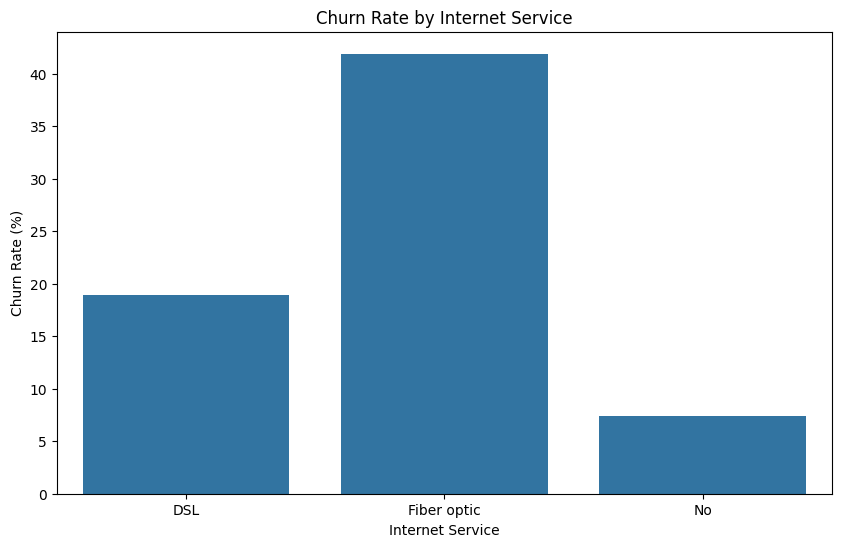

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(data=internet_churn, x='InternetService', y='churn_rate%')
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate (%)')
plt.show()

### Churn Rate By Internet Services

- Customers with (Fiber optic) service show the highest churn rate(~42%), indicating maybe dissatisfaction with pricing or service quality or releability
- The ‘No Internet Service’ segment has the lowest churn (~7%), as they likely subscribe only to phone services — lower involvement means fewer reasons to cancel
- DSL users churn far less (~19%), suggesting a more balanced price-to-value perception.
- Fiber customers are the most at-risk group, and should be prioritized for retention offers, improved service quality, or pricing adjustments.

# Churn Rate By Number of Extra Services 

In [47]:
add_ons = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'] 

In [48]:
for col in add_ons:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

In [49]:
df['Extras_Count'] = df[add_ons].sum(axis=1)
df['Extras_Count']

0       1
1       2
2       2
3       3
4       0
       ..
7038    5
7039    4
7040    1
7041    0
7042    5
Name: Extras_Count, Length: 7043, dtype: int64

In [50]:
df['Extras_Engagement'] = pd.cut(df['Extras_Count'], bins=[-1, 0, 2, 6], labels=['No Extras', 'Low Engagement', 'High Engagement'])

In [51]:
Extras_churn = pd.crosstab(df['Extras_Engagement'], df['Churn_bins'])
Extras_churn['churn_rate%'] = (Extras_churn[1] / (Extras_churn[0] + Extras_churn[1]) )* 100
Extras_churn = Extras_churn.reset_index()   

In [52]:
Extras_churn

Churn_bins,Extras_Engagement,0,1,churn_rate%
0,No Extras,1744,475,21.406039
1,Low Engagement,1187,812,40.620310
2,High Engagement,2243,582,20.601770


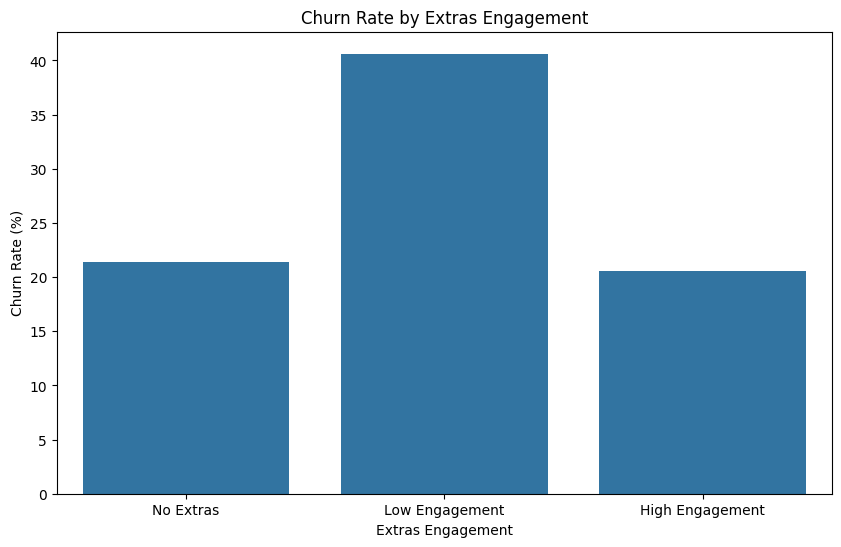

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(data=Extras_churn, x='Extras_Engagement', y='churn_rate%')
plt.title('Churn Rate by Extras Engagement')
plt.xlabel('Extras Engagement')
plt.ylabel('Churn Rate (%)')
plt.show()

### Churn Rate by Extras Engagement

- Customers with Low Engagement (~41%) show the highest churn rate, indicating that users who subscribe to only a few add-ons (1–2) may not feel strong value from the extra services.

- The No Extras segment (~21%) has a moderate churn rate — likely casual users with minimal attachment to the service, making them easier to lose.

- High Engagement customers (~20%) show the lowest churn, suggesting that users who adopt multiple add-ons (3+) are more involved in the ecosystem and see higher overall value.

- This clearly shows that the more add-ons a customer uses, the less likely they are to churn, emphasizing the importance of increasing customer engagement across multiple services.

In [54]:
cluster_df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 
                 'Contract', 'PaymentMethod', 'InternetService']].copy()

In [55]:
cluster_df = pd.get_dummies(cluster_df, drop_first=True)

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

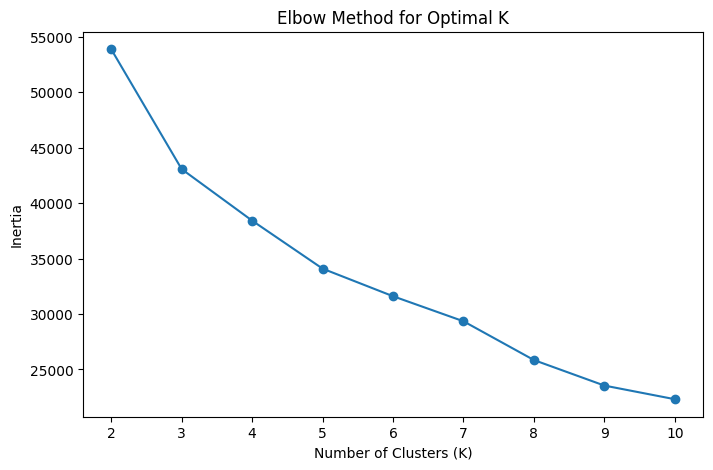

In [57]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)
cluster_df['Cluster'] = cluster_labels
df['Cluster'] = cluster_labels  
cluster_df['Cluster'].value_counts()

Cluster
2    2190
0    2148
1    1643
3    1062
Name: count, dtype: int64

In [59]:
cluster_summary = df.groupby('Cluster')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean().round(2)
cluster_summary

,tenure,MonthlyCharges,TotalCharges
Cluster,,,
0,57.87,87.71,5100.45
1,15.30,46.04,742.27
2,16.86,77.17,1352.65
3,39.19,21.73,864.93


In [60]:
cluster_churn = df.groupby('Cluster')['Churn_bins'].mean().round(3) * 100
cluster_churn

Cluster
0    12.7
1    23.4
2    53.3
3     4.2
Name: Churn_bins, dtype: float64

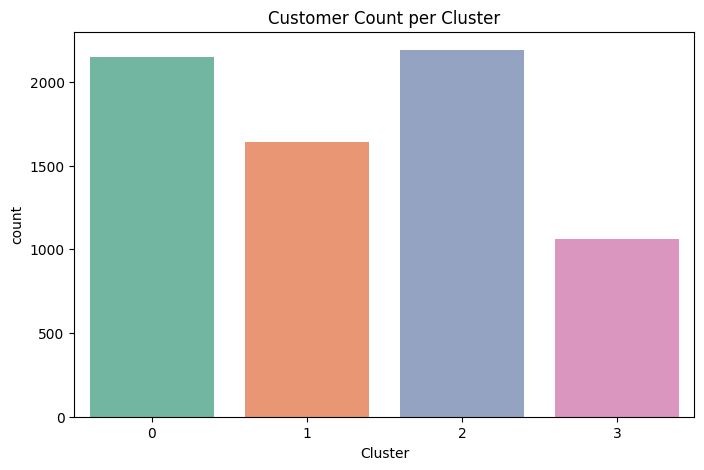

In [61]:
plt.figure(figsize=(8,5))
sns.countplot(x='Cluster', data=df, palette='Set2')
plt.title('Customer Count per Cluster')
plt.show()

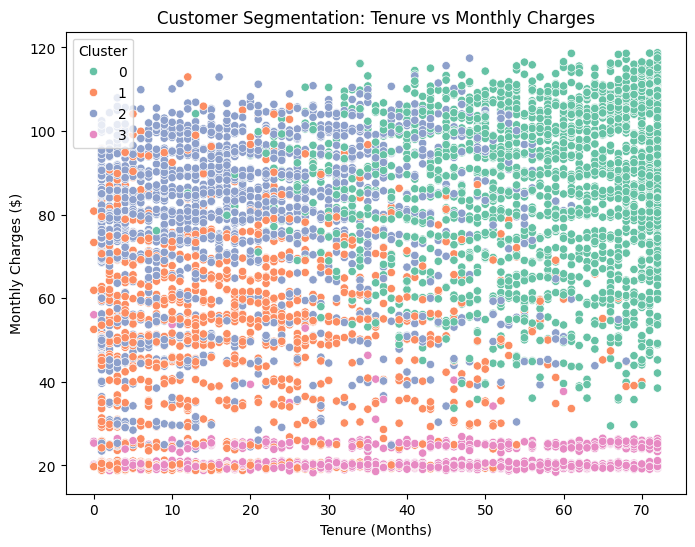

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation: Tenure vs Monthly Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges ($)')
plt.show()

### Customer Segmentation Using K-Means (K = 4)

- Based on tenure, monthly charges, total charges, contract type, payment method, and internet service, four clear customer segments were identified.

- The goal was to understand the customer base in terms of loyalty, spending behavior, and churn risk.

- Each segment highlights a distinct customer journey and business opportunity for the company.

#### Cluster 0 – High-Value Loyalists

- Long-term customers (~58 months) paying premium monthly charges (~$88)

- Very high total revenue contribution (~$5100)

- Moderate churn rate (~12.7%)

- Represents customers with high satisfaction and strong retention potential

- Should be prioritized for loyalty programs and premium care

#### Cluster 1 – Price-Sensitive Newcomers

- Newer customers (~15 months) on lower monthly plans (~$46)

- Low total charges (~$740)

- Medium churn rate (~23%)

- Customers are still evaluating service value and have weak engagement

- Should be targeted with onboarding improvement and retention offers

#### Cluster 2 – At-Risk Premium Customers

- Short/medium tenure (~17 months) but paying high monthly fees (~$77)

- Moderate total spend (~$1350)

- Extremely high churn rate (~53%)

- Indicates serious dissatisfaction despite high spending — price-to-value mismatch

- Key target segment for churn reduction initiatives (discounts, personalized retention offers)

#### Cluster 3 – Stable Low-Spend Loyalists

- Medium to long tenure (~39 months) with very low monthly charges (~$22)

- Low total revenue (~$865) but lowest churn (~4%)

- Represent the loyal base — satisfied but low-value customers

- Potential for upselling through bundle offers or internet service upgrades

## Summary

- Clusters clearly show a link between tenure, spending behavior, and churn risk.

- Customers paying more early in their journey churn the fastest.

- Long-term customers, regardless of spending, tend to stay loyal.

- Retention strategies should focus mainly on Cluster 2 (At-Risk Premiums) and early-stage engagement for Cluster 1 (Newcomers).

##  Final Business Recommendations and Summary

After a full analysis combining SQL extraction, cleaning, statistical testing, and segmentation, the overall churn rate was found to be around **26.5%**.  
The results show that churn is mainly driven by **early tenure, flexible contracts, higher monthly charges, and low service engagement**.  
Below are the main actions the company should take based on the insights from the analysis.

---

### **1. Early-Stage Retention Needs Priority**
- The first **1–3 months** show the **highest churn rate (~57%)**, meaning customers leave before building trust with the company.  
- Indicates weak onboarding or poor first experience.  
- **Action:** Improve onboarding, enhance early support, and deliver clear value in the first month to reduce early churn.

---

### **2. High-Charge Customers Leaving Early**
- Customers paying **$70+ per month** but staying less than a year are the **most at-risk (churn ~53%)**.  
- High-paying users may not see enough value for what they pay.  
- **Action:** Introduce loyalty discounts, personalized retention offers, and service quality improvements for premium users (especially Fiber customers).

---

### **3. Long-Term Contracts Reduce Churn**
- **Month-to-Month contracts** churn at ~43%, while **one-year and two-year plans** churn at just **11% and 3%** respectively.  
- Longer contracts clearly build stickiness and predictability.  
- **Action:** Promote longer-term plans using small monthly discounts, free add-ons, or renewal bonuses.

---

### **4. Fiber Optic Customers Require Attention**
- Fiber optic customers churn almost **2× more** than DSL users.  
- Indicates possible dissatisfaction with pricing or reliability.  
- **Action:** Review Fiber service quality and pricing strategy, and offer retention incentives for this segment.

---

### **5. Engagement Through Add-Ons Helps Retain Customers**
- Customers with **multiple add-ons** (e.g., Security, Backup, Streaming) churn much less (~20%) than low-engagement users (~40%).  
- Higher engagement = stronger loyalty.  
- **Action:** Promote bundles and personalized upsells to under-engaged customers.

---

### **6. Retain and Reward Loyal Segments**
- **Cluster 0 – High-Value Loyalists:** Long tenure, high spenders, churn only **~12%**  
- **Cluster 3 – Stable Low-Spend Loyalists:** Medium tenure, low spenders, churn only **~4%**  
- These are the company’s core loyal base.  
- **Action:** Offer loyalty programs, referral bonuses, and premium support to retain them.

---

### **7. Insights for Future Work**
- Statistical tests confirmed **tenure**, **monthly charges**, and **contract type** as the top churn predictors.  
- These can feed a **churn prediction model** for proactive retention.  
- **Action:** Build a churn scoring model using these predictors to identify at-risk customers early.

---

### **Overall Summary**
- The data shows that **the first few months are the most critical**, and **contract flexibility + high charges** strongly increase churn risk.  
- Driving engagement through add-ons and improving Fiber customer satisfaction can significantly reduce churn.  
- In short:  
  - **Fix early experience**  
  - **Protect premium customers**  
  - **Promote commitment and engagement**


In [64]:
df.to_excel("Final_sheet.xlsx", index=False)